<a href="https://colab.research.google.com/github/BenedettiEsteban/BenedettiEsteban.github.io/blob/main/RelevamientoLogisticoSucursalesAgosto2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Subir Bases de Datos
from google.colab import files
uploaded = files.upload()


Saving BaseDatosSKU.csv to BaseDatosSKU.csv
Saving DatosSucAgosto .csv to DatosSucAgosto .csv


In [4]:
bt = pd.read_csv('BaseDatosSKU.csv')
bt

,Articulo,SKU
0,Polietileno Negro 6/200,840
1,Manguera Solytac 1/2 x 25,688
2,Bols. Compactad 80 x 100 /40 x u,119
3,Aislante 1M x 10 Blanco,9
4,colchon para Mascota B/Grande,428
...,...,...
196,Jardin Vertical Artf. Milan,568
197,Jardin Vertical Artf. Group Violet,570
198,Bolsa Compactadora Flowi Eco 80x 110 (Cja x 30),2516
199,Cinta de Peligro 8 xm x 200 mts,375


In [5]:
at = pd.read_csv('DatosSucAgosto .csv')
at


,Año,Mes,Dia del Mes,Sucursal,Materiales (SKU),Cantidad de Materiales (Bultos & Paquetes),Dia de la Semana
0,2025,Agosto,1,URCA,2252,3,Viernes
1,2025,Agosto,1,URCA,828,2,Viernes
2,2025,agosto,1,URCA,119,2,viernes
3,2025,agosto,1,URCA,660,2,viernes
4,2025,agosto,1,URCA,170,1,viernes
...,...,...,...,...,...,...,...
464,2025,agosto,29,URCA,2256,3,lunes
465,2025,agosto,29,URCA,854,1,lunes
466,2025,agosto,29,URCA,856,1,lunes
467,2025,agosto,29,URCA,390,9,lunes


     Sucursal  Dia del Mes  Cantidad de Materiales (Bultos & Paquetes)
0    B.Jardin            1                                          14
1    B.Jardin            4                                          20
2    B.Jardin            6                                          20
3    B.Jardin            8                                           8
4    B.Jardin           11                                          29
5    B.Jardin           13                                          25
6    B.Jardin           15                                          22
7    B.Jardin           18                                          11
8    B.Jardin           20                                          14
9    B.Jardin           22                                          16
10   B.Jardin           25                                          15
11   B.Jardin           27                                          38
12   B.Jardin           29                                          14
13    

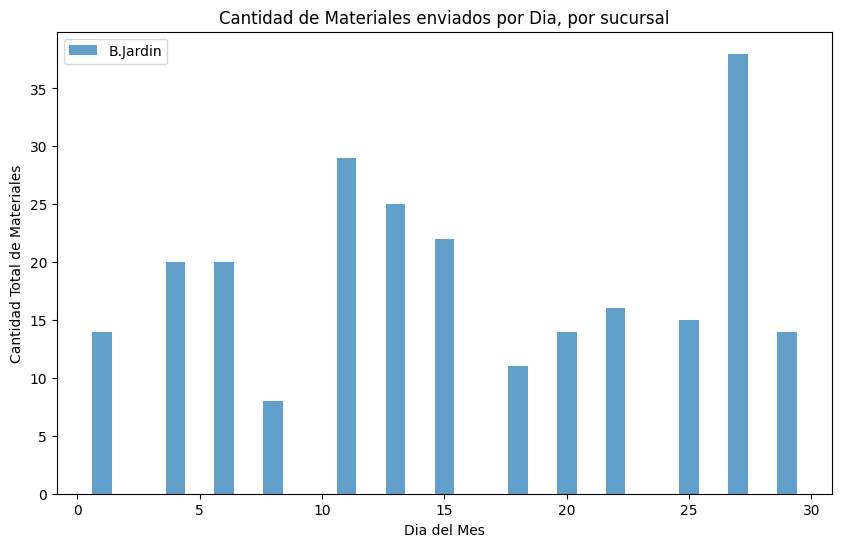

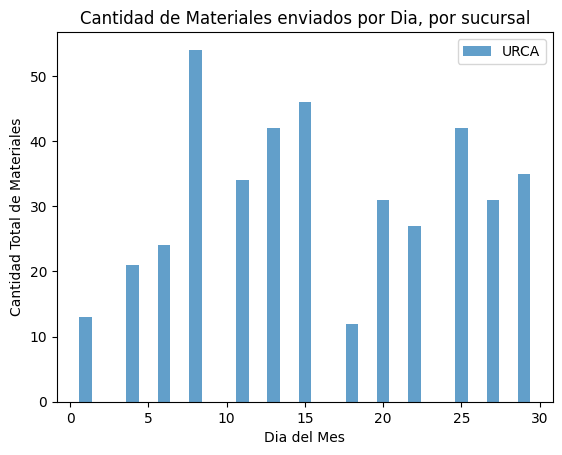

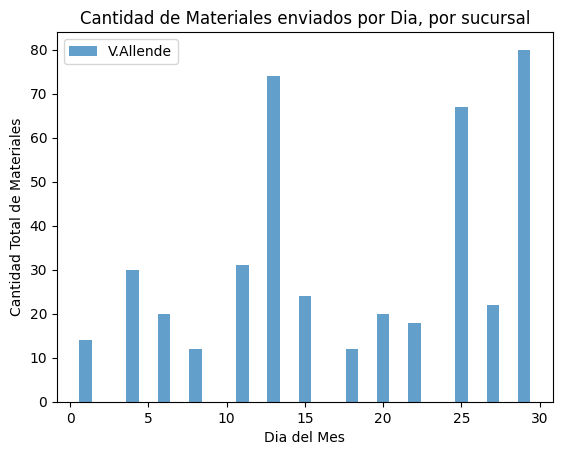

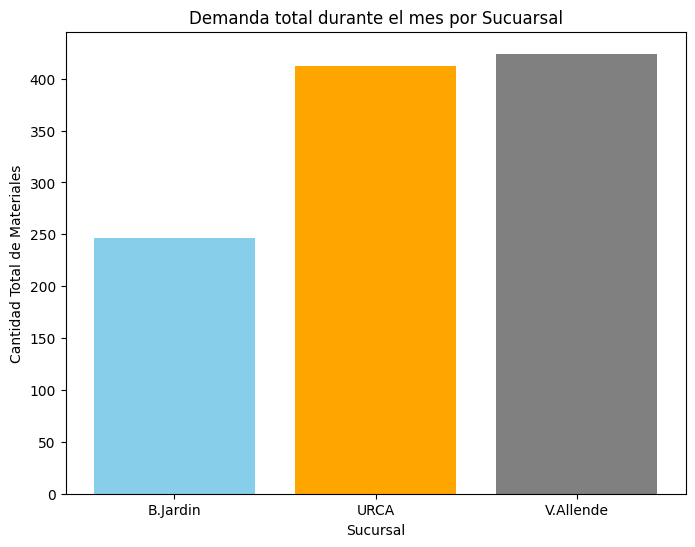

In [59]:
# Analisis del flujo de materiales enviados Por dia a C/Sucursal

Cant_Mat_Enviados = (at.groupby(["Sucursal","Dia del Mes"])["Cantidad de Materiales (Bultos & Paquetes)"].sum()
.reset_index())
print(Cant_Mat_Enviados)

# Analisis del flujo de Materiales enviados en el Mes de Agosto a C/Sucursal
Cant_total_X_Sucursal = (Cant_Mat_Enviados.groupby(["Sucursal"])["Cantidad de Materiales (Bultos & Paquetes)"].sum()
.reset_index())

print("Cantidad Total de Materiales enviados durante el mes de Agosto para cada sucursal es de:")
print(Cant_total_X_Sucursal)

# Visualizamos dichos Resultados

# visualizamos la variacion del flujo durante el Mes
durante_el_mes = at.groupby(["Sucursal", "Dia del Mes"])["Cantidad de Materiales (Bultos & Paquetes)"].sum().reset_index()

plt.figure(figsize=(10, 6))

for sucursal in durante_el_mes["Sucursal"].unique():
  data = durante_el_mes[durante_el_mes["Sucursal"] == sucursal]
  plt.bar(data["Dia del Mes"], data["Cantidad de Materiales (Bultos & Paquetes)"], label= sucursal, alpha=0.7)

  plt.xlabel("Dia del Mes")
  plt.ylabel("Cantidad Total de Materiales")
  plt.title("Cantidad de Materiales enviados por Dia, por sucursal")
  plt.legend()
  plt.show()



 # visualizamos la Sucursal que mas Demanda / Flujo de Materiales tuvo durante el mes de Agosto
plt.figure(figsize=(8, 6))
plt.bar(Cant_total_X_Sucursal["Sucursal"], Cant_total_X_Sucursal["Cantidad de Materiales (Bultos & Paquetes)"], color = ["skyblue", "orange", "grey"])

plt.xlabel("Sucursal")
plt.ylabel("Cantidad Total de Materiales")
plt.title("Demanda total durante el mes por Sucuarsal")
plt.show()



In [60]:
# Unimos la Demanda con el Catalogo de Articulos

bt_merge = at.merge(
    bt,
    left_on="Materiales (SKU)",   # nombre de la columna en la tabla de demanda
    right_on="SKU",               # nombre de la columna en la tabla de artículos
    how="left"                    # "left" para mantener todos los registros de demanda
)

# Ver primeras filas
bt_merge.head(100)

,Año,Mes,Dia del Mes,Sucursal,Materiales (SKU),Cantidad de Materiales (Bultos & Paquetes),Dia de la Semana,Articulo,SKU
0,2025,Agosto,1,URCA,2252,3,Viernes,"Cartón Corrugado 0,90 x 25",2252.0
1,2025,Agosto,1,URCA,828,2,Viernes,Polietileno Negro 2/100,828.0
2,2025,agosto,1,URCA,119,2,viernes,Bols. Compactad 80 x 100 /40 x u,119.0
3,2025,agosto,1,URCA,660,2,viernes,Manguera tricolor 1/2 x 15 m,660.0
4,2025,agosto,1,URCA,170,1,viernes,Bolsa PP 22 x 35,170.0
...,...,...,...,...,...,...,...,...,...
95,2025,agosto,8,URCA,21,5,viernes,Alambre Galv. X 50 mts,21.0
96,2025,agosto,8,URCA,22,2,viernes,Alambre Galv. X 100 mts,22.0
97,2025,agosto,8,URCA,406,2,viernes,CintaCerco 63mm x 20 mts,406.0
98,2025,agosto,8,URCA,490,12,viernes,Film Comida 38 x 300 mts,490.0


/tmp/ipython-input-789002756.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top10 = df_grouped.groupby("Sucursal").apply(


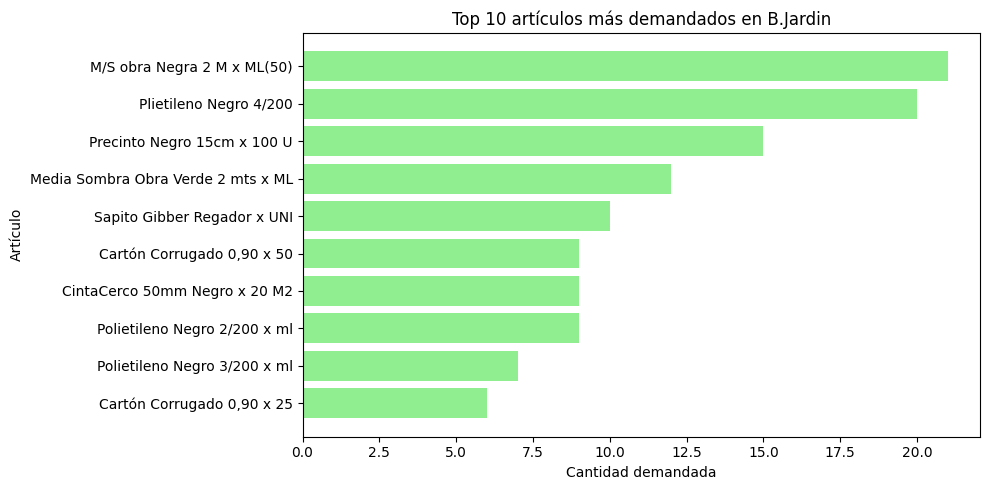

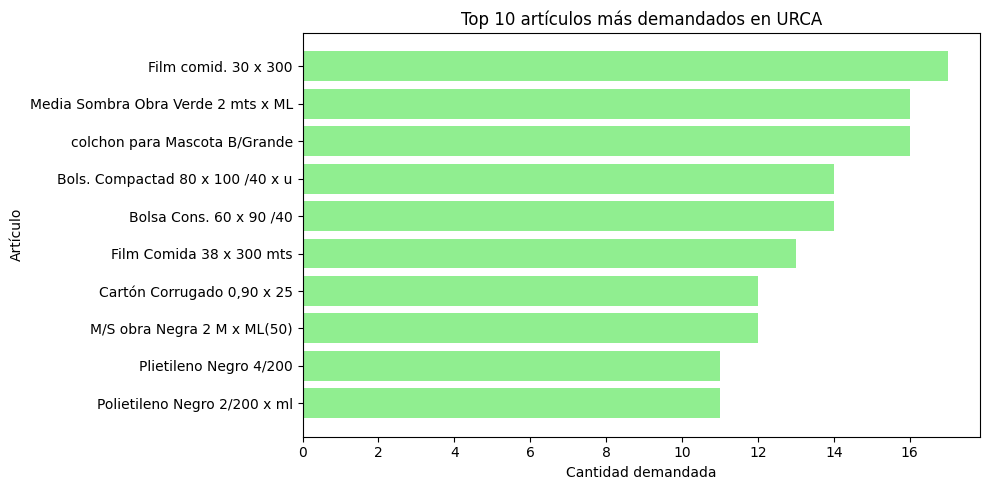

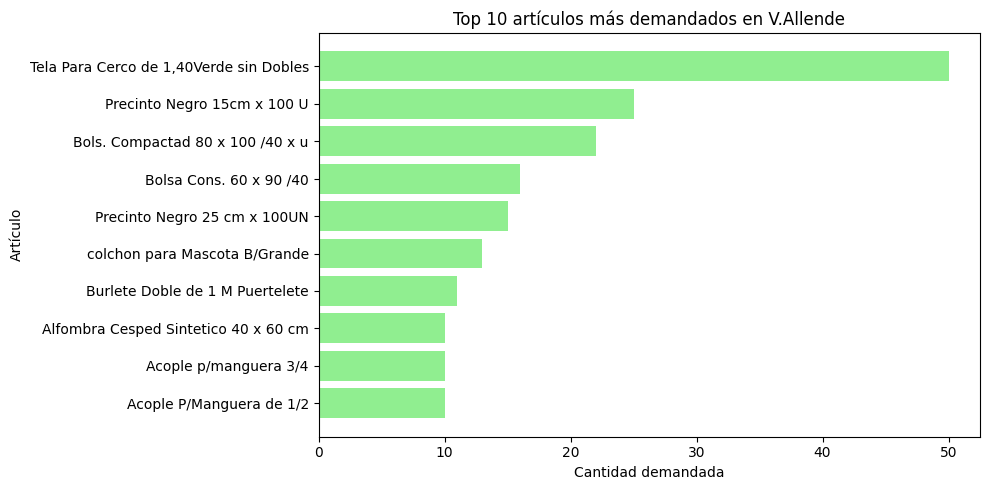

In [61]:
# Analizaremos cuales son los 10 Materiales mas Demandados por C/Sucursal de mayo a menor
# 1. Agrupar por sucursal, artículo y SKU, sumando las cantidades
df_grouped = bt_merge.groupby(
    ["Sucursal", "Articulo", "Materiales (SKU)"], as_index=False
)["Cantidad de Materiales (Bultos & Paquetes)"].sum()

# 2. Para cada sucursal, ordenar de mayor a menor y quedarse con los 10 primeros
df_top10 = df_grouped.groupby("Sucursal").apply(
    lambda x: x.sort_values(
        "Cantidad de Materiales (Bultos & Paquetes)", ascending=False
    ).head(10)
).reset_index(drop=True)

# 3. Ordenar el resultado final por sucursal y por cantidad (descendente)
df_top10 = df_top10.sort_values(
    ["Sucursal", "Cantidad de Materiales (Bultos & Paquetes)"],
    ascending=[True, False]
)

# 4. Mostrar resultado
df_top10.head(30)



# recorrer cada sucursal y graficar
for sucursal, datos in df_top10.groupby("Sucursal"):
    plt.figure(figsize=(10,5))
    plt.barh(datos["Articulo"], datos["Cantidad de Materiales (Bultos & Paquetes)"], color="lightgreen")
    plt.gca().invert_yaxis()  # el más alto arriba
    plt.title(f"Top 10 artículos más demandados en {sucursal}")
    plt.xlabel("Cantidad demandada")
    plt.ylabel("Artículo")
    plt.tight_layout()
    plt.show()